In [38]:
import sympy as sp
from dtumathtools import *
sp.init_printing()
from sympy.solvers.solveset import linsolve
import math as math

# `Assignment 2`

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
fname_2290 = r'/Users/Raphael/Documents/GitHub_repositories/Hydrology-group-8/hydrology-group-8/Assignment_2/Assignment_2_data/produkt_pkt_aero_20210101_20211229_02290.txt'
fname_4466 = r'/Users/Raphael/Documents/GitHub_repositories/Hydrology-group-8/hydrology-group-8/Assignment_2/Assignment_2_data/produkt_pkt_aero_20210101_20211231_04466.txt'

data_2290 = pd.read_csv(fname_2290,delimiter = ';')
data_4466 = pd.read_csv(fname_4466,delimiter = ';')

data_2290 = data_2290.replace(-999,np.nan)
data_4466 = data_4466.replace(-999,np.nan)

In [5]:
date = 2021010406
day_data_2290 = data_2290.loc[data_2290['MESS_DATUM'] == date]
date = 2021010400
day_data_4466 = data_4466.loc[data_4466['MESS_DATUM'] == date]

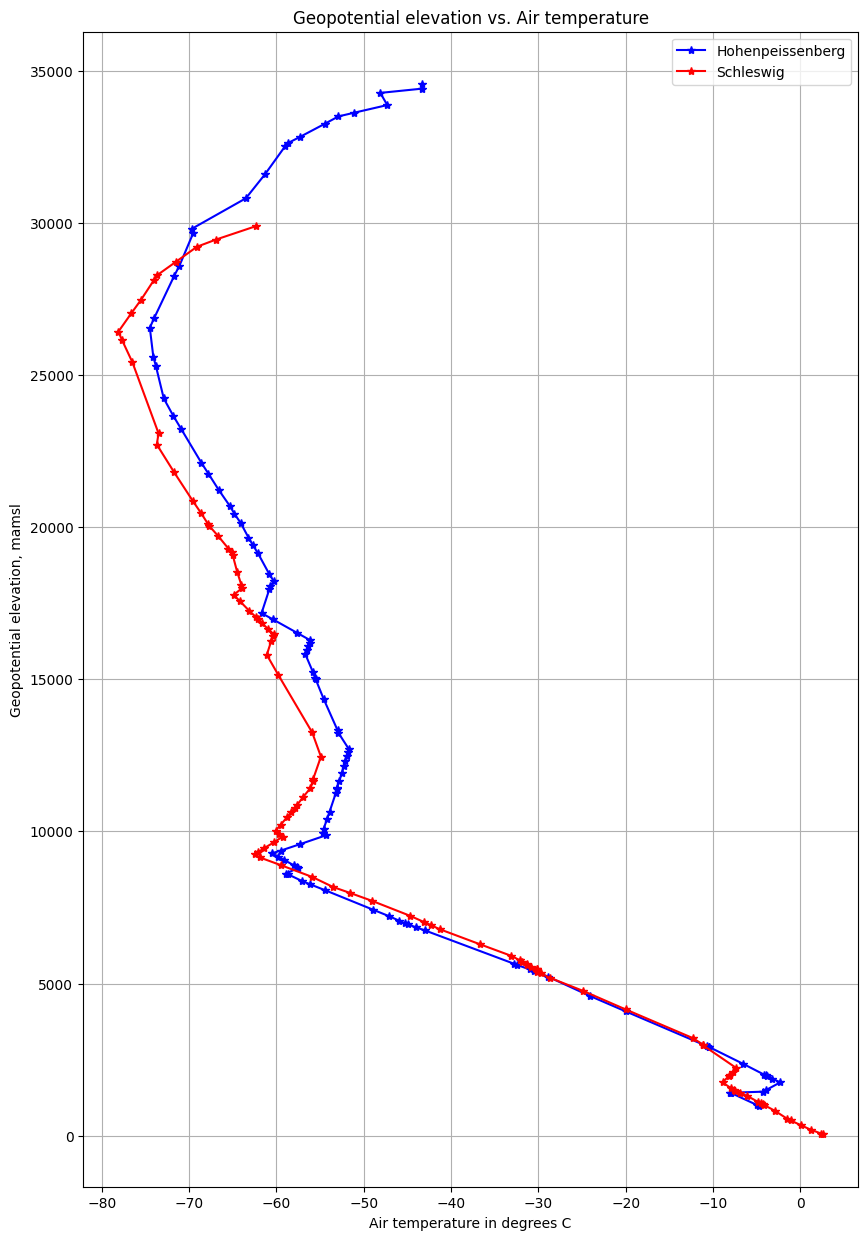

In [6]:
plt.figure(figsize=(10,15))
plt.plot(day_data_2290['AET'],day_data_2290['AEH'],'b-*')
plt.plot(day_data_4466['AET'],day_data_4466['AEH'],'r-*')
plt.xlabel('Air temperature in degrees C')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. Air temperature')
plt.grid('Below')


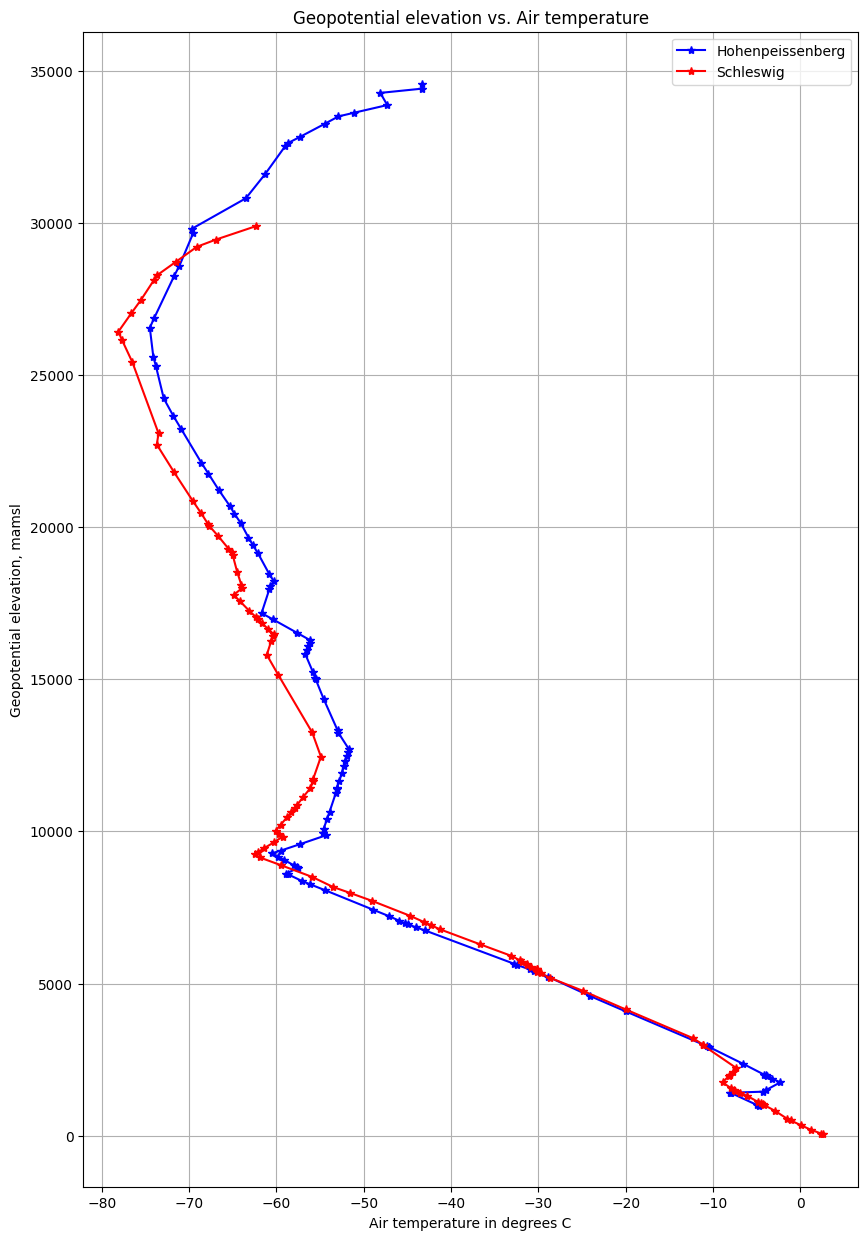

In [7]:
plt.figure(figsize=(10,15))
plt.plot(day_data_2290['AET'],day_data_2290['AEH'],'b-*')
plt.plot(day_data_4466['AET'],day_data_4466['AEH'],'r-*')
plt.xlabel('Air temperature in degrees C')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. Air temperature')
plt.grid('Below')

# 4)

## water vapor density

First find `e = water vapour pressure`:



$e^*(T)=611*10^{\frac{7.5(T-273.15)}{T-35.85}}$

In [8]:
# transforming the csv data for temperature into a numpy array
T2290 = day_data_2290['AET'].to_numpy()
T4466 = day_data_4466['AET'].to_numpy()

# computing water vapour in [mb] pressure to an array
water_vapour_pressure2290 = 611 * 10 ** ((7.5 * (T2290)) / (T2290 +273.15 - 35.85))
water_vapour_pressure4466 = 611 * 10 ** ((7.5 * (T4466)) / (T4466 +273.15 - 35.85))

And now we can compute the `water vapour density` with $ρ_v$ [g/m^3] $= \frac{0.622 * e}{R_{da}*T}$:

With $e$ = water vapor pressure, $R_{da}$=Ideal gas constant for dry air and $T$ = temperature.

In [9]:
# water vapour density in [g/m^3]
Rda = 287 # [JKG^-1K^-1]

water_vapour_density2290 = (0.622 * water_vapour_pressure2290) / (Rda * (T2290+273.15))
water_vapour_density4466 = (0.622 * water_vapour_pressure4466) / (Rda * (T4466+273.15))


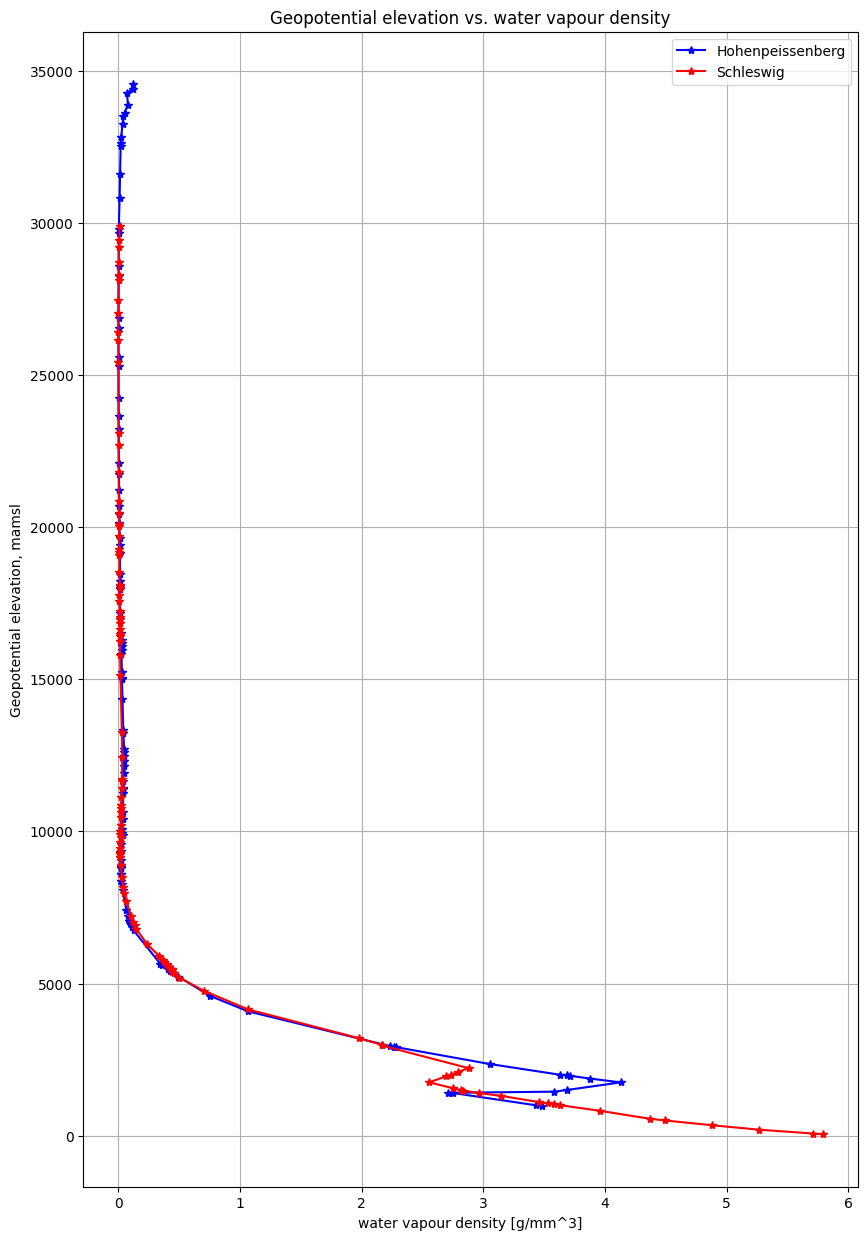

In [10]:
plt.figure(figsize=(10,15))
plt.plot(water_vapour_density2290*1000,day_data_2290['AEH'],'b-*') # to get it in [g/mm^3]
plt.plot(water_vapour_density4466*1000,day_data_4466['AEH'],'r-*') # to get it in [g/mm^3]
plt.xlabel('water vapour density [g/mm^3]')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. water vapour density')
plt.grid('Below')

## Dry air density

`mixing ratio` = $mr = \frac{0.622*e}{p},$

with p = total (moist) air pressure which is given and we already calculated e.

In [11]:
# air pressure
air_pressure2290 = day_data_2290['AEP'].to_numpy()
air_pressure4466 = day_data_4466['AEP'].to_numpy()


# mixing ratio
mixing_ratio2290 = (0.622*water_vapour_pressure2290) / air_pressure2290
mixing_ratio4466 = (0.622*water_vapour_pressure4466) / air_pressure4466


`dry air density` [kg/m^3] = $ρ_{da}= \frac{ρ_v}{mr}$

In [12]:
dry_air_density2290 = water_vapour_density2290/mixing_ratio2290
dry_air_density4466 = water_vapour_density4466/mixing_ratio4466

plotting:

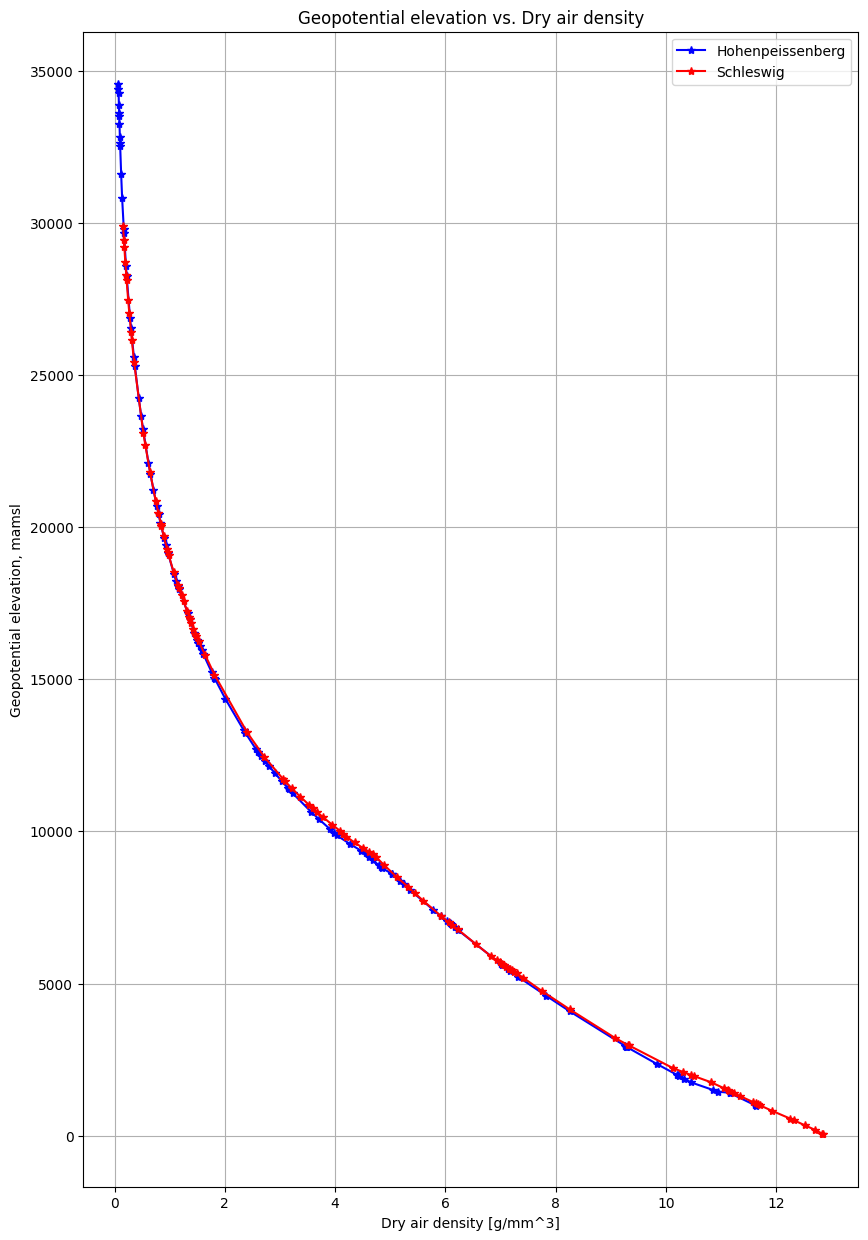

In [13]:
plt.figure(figsize=(10,15))
plt.plot(dry_air_density2290*1000,day_data_2290['AEH'],'b-*') # to get it in [g/mm^3]
plt.plot(dry_air_density4466*1000,day_data_4466['AEH'],'r-*') # to get it in [g/mm^3]
plt.xlabel('Dry air density [g/mm^3]')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. Dry air density')
plt.grid('Below')

# Moist air density

$SH = \frac{ρ_v}{ρ} = \frac{p_v}{ρ_{da}+ρ_v}$

$SH = ρ_{da}+ρ_v = ρ,$

with $ρ$= `moist air density`.


In [14]:
# moist air density [gm^3]
moist_air_density2290 = dry_air_density2290 + water_vapour_density2290
moist_air_density4466 = dry_air_density4466 + water_vapour_density4466

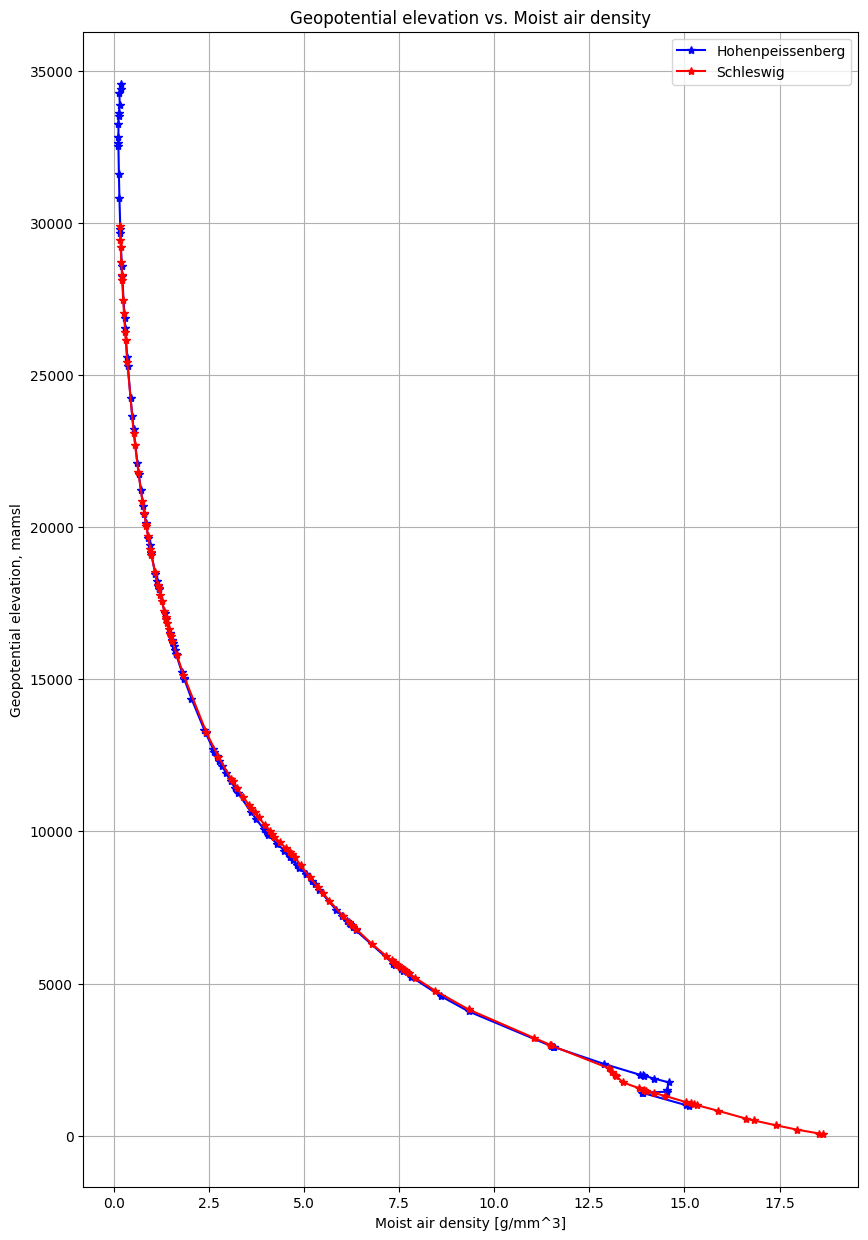

In [15]:
plt.figure(figsize=(10,15))
plt.plot(moist_air_density2290*1000,day_data_2290['AEH'],'b-*') # to get it in [g/mm^3]
plt.plot(moist_air_density4466*1000,day_data_4466['AEH'],'r-*') # to get it in [g/mm^3]
plt.xlabel('Moist air density [g/mm^3]')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. Moist air density')
plt.grid('Below')

# Mixing ratio

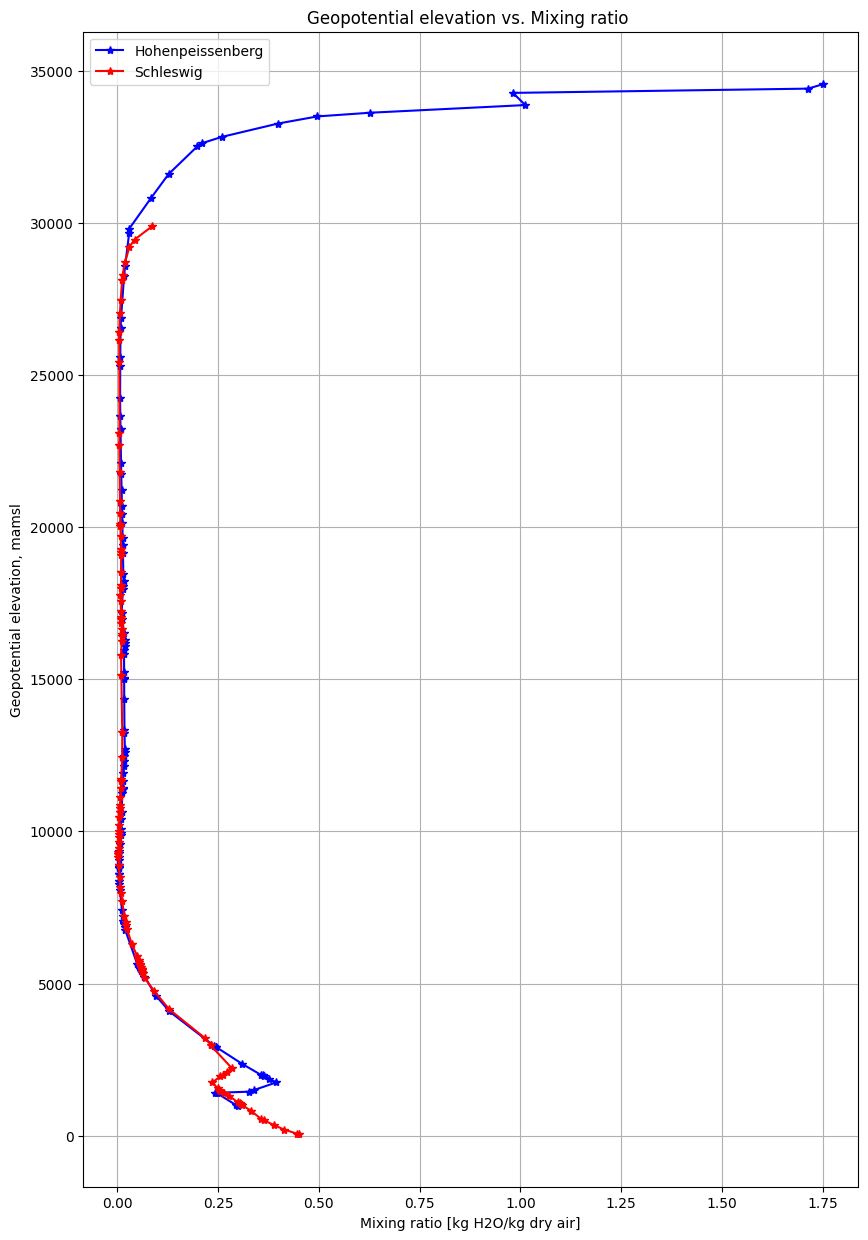

In [16]:
plt.figure(figsize=(10,15))
plt.plot(mixing_ratio2290,day_data_2290['AEH'],'b-*') 
plt.plot(mixing_ratio4466,day_data_4466['AEH'],'r-*') 
plt.xlabel('Mixing ratio [kg H2O/kg dry air]')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. Mixing ratio ')
plt.grid('Below')

# Specific humidity

$SH = \frac{ρ_v}{ρ}$

In [17]:
# specific humidity 
specific_humidity2290 = water_vapour_density2290/moist_air_density2290
specific_humidity4466 = water_vapour_density4466/moist_air_density4466

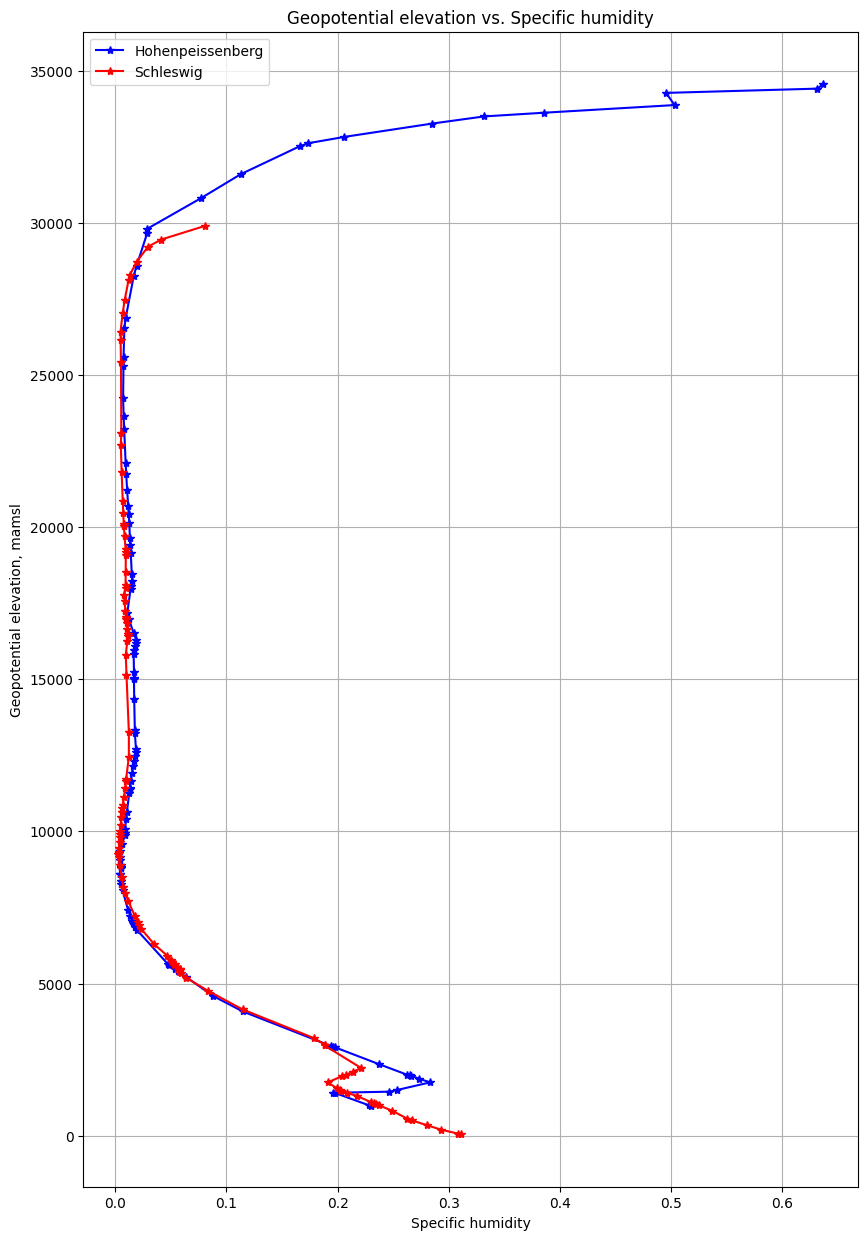

In [18]:
plt.figure(figsize=(10,15))
plt.plot(specific_humidity2290,day_data_2290['AEH'],'b-*') 
plt.plot(specific_humidity4466,day_data_4466['AEH'],'r-*') 
plt.xlabel('Specific humidity')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. Specific humidity')
plt.grid('Below')

# 6)

# Depth of precipitable water 

$D [m] = \frac{1}{ρ_wg}\sum_{n=1}^{N}(p_{n-1}-p_n)\frac{SH_{n-1}+SH_n}{2}$

In [19]:
pw = 1000 # kgm^3
g = 9.81 #m/s^2


sumation_array2290 =  [(air_pressure2290[n-1] - air_pressure2290[n]) * ((specific_humidity2290[n-1] + specific_humidity2290[n]) / 2)for n in range(1, len(air_pressure2290))]
sumation_array4466 =  [(air_pressure4466[n-1] - air_pressure4466[n]) * ((specific_humidity4466[n-1] + specific_humidity4466[n]) / 2)for n in range(1, len(air_pressure4466))]

pg_terms2290 = np.ones(109)*(pw*g)
pg_terms4466 = np.ones(103)*(pw*g)

depth_of_precipitable_water2290 = pg_terms2290 * sumation_array2290
depth_of_precipitable_water4466 = pg_terms4466 * sumation_array4466


In [20]:
elevation2290 = day_data_2290['AEH'].to_numpy()

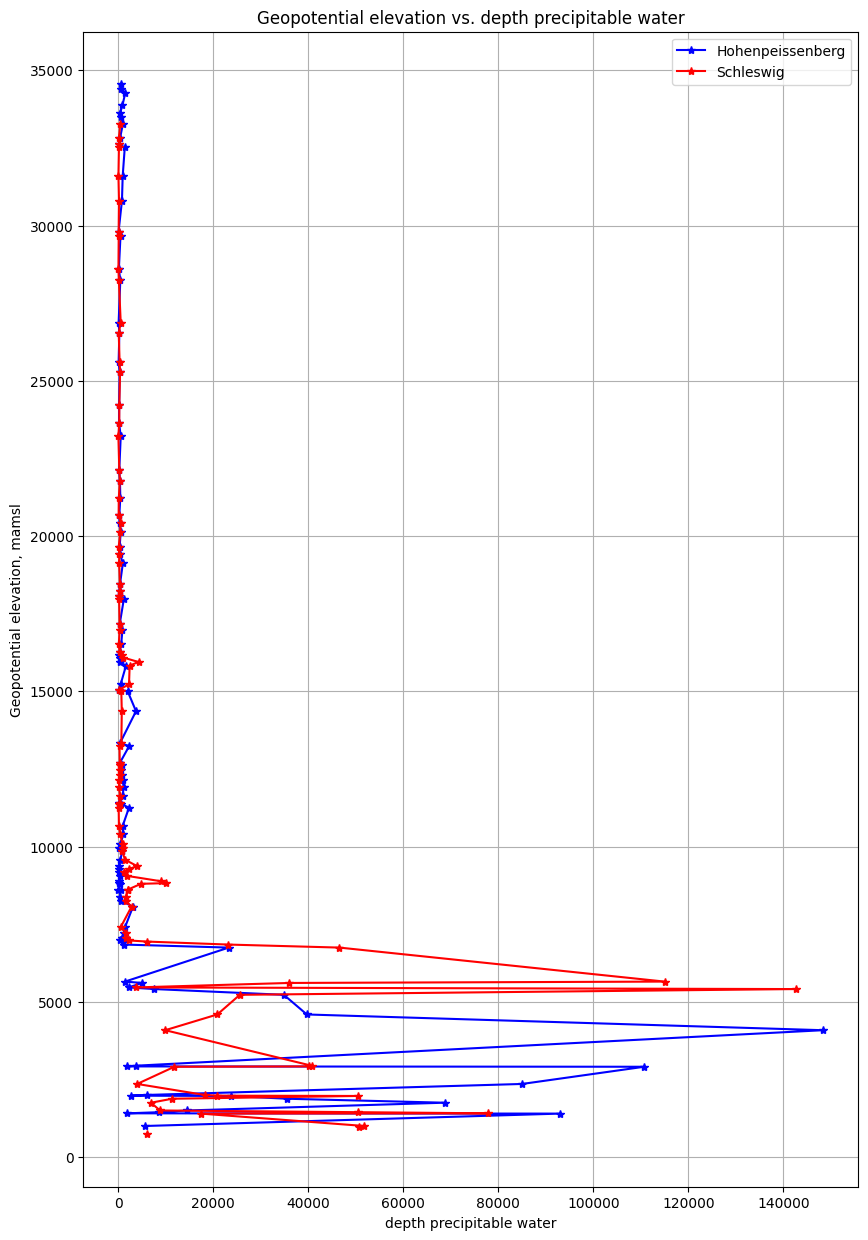

In [21]:
plt.figure(figsize=(10,15))
plt.plot(depth_of_precipitable_water2290,elevation2290[1:110],'b-*')
plt.plot(depth_of_precipitable_water4466,elevation2290[1:104],'r-*')
#plt.plot(specific_humidity4466,day_data_4466['AEH'],'r-*') 
plt.xlabel('depth precipitable water')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. depth precipitable water')
plt.grid('Below')

# 8)


# Specific humidity profiles of 2290 over one year

In [22]:
# redefining all the previous code not for one day anymore but for data of the whole year

all_air_pressure2290 = data_2290['AEP'].to_numpy()
all_air_pressure4466 = data_4466['AEP'].to_numpy()

all_T2290 = data_2290['AET'].to_numpy()
all_T4466 = data_4466['AET'].to_numpy()

all_water_vapour_pressure2290 = 611 * 10 ** ((7.5 * (all_T2290)) / (all_T2290 +273.15 - 35.85))
all_water_vapour_pressure4466 = 611 * 10 ** ((7.5 * (all_T4466)) / (all_T4466 +273.15 - 35.85))

all_water_vapour_density2290 = (0.622 * all_water_vapour_pressure2290) / (Rda * (all_T2290+273.15))
all_water_vapour_density4466 = (0.622 * all_water_vapour_pressure4466) / (Rda * (all_T4466+273.15))

all_mixing_ratio2290 = (0.622*all_water_vapour_pressure2290) / all_air_pressure2290
all_mixing_ratio4466 = (0.622*all_water_vapour_pressure4466) / all_air_pressure4466

all_dry_air_density2290 = all_water_vapour_density2290/all_mixing_ratio2290
all_dry_air_density4466 = all_water_vapour_density4466/all_mixing_ratio4466

all_moist_air_density2290 = all_dry_air_density2290 + all_water_vapour_density2290
all_moist_air_density4466 = all_dry_air_density4466 + all_water_vapour_density4466

all_specific_humidity2290 = all_water_vapour_density2290/all_moist_air_density2290
all_specific_humidity4466 = all_water_vapour_density4466/all_moist_air_density4466

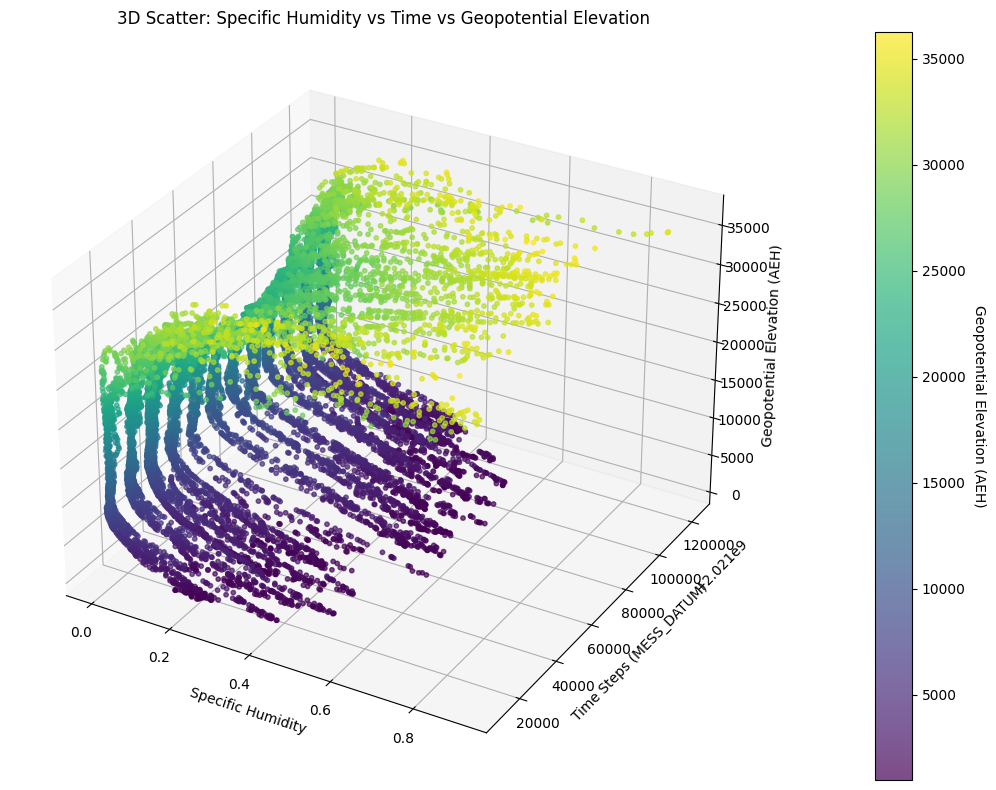

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Not strictly needed in newer matplotlib, but sometimes good to keep


# ------------------------------------------------------------------------------
# 1. Read / prepare your data
# ------------------------------------------------------------------------------
# Example: Suppose you have a DataFrame called data_2290 from your CSV
# Make sure each column you need is in numeric form (floats, ints, or properly converted).
# If needed, parse 'MESS_DATUM' as numeric or ordinal. Otherwise, you can keep it as datetime 
# and convert to, e.g., a timestamp integer for the Y-axis.

# Example for time axis:
# data_2290['MESS_DATUM'] = pd.to_datetime(data_2290['MESS_DATUM'], format='%Y%m%d%H')
# data_2290['time_ordinal'] = data_2290['MESS_DATUM'].map(pd.Timestamp.toordinal)
# or simply use the numeric values in MESS_DATUM if they’re already in yyyymmddhh format

time_axis = data_2290['MESS_DATUM'].to_numpy()  # or data_2290['time_ordinal'].to_numpy()
geopotential_elevation = data_2290['AEH'].to_numpy()

# ------------------------------------------------------------------------------
# 2. Create a 3D scatter plot
# ------------------------------------------------------------------------------
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# You can color the points by another variable if you like:
sc = ax.scatter(
    all_specific_humidity2290,   # X
    time_axis,                   # Y
    geopotential_elevation,      # Z
    c=geopotential_elevation,    # color by AEH, or something else
    cmap='viridis',
    marker='o',
    s=10,                        # marker size
    alpha=0.7                    # transparency (optional)
)

# Add colorbar (optional)
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Geopotential Elevation (AEH)', rotation=270, labelpad=15)

# ------------------------------------------------------------------------------
# 3. Label axes and show
# ------------------------------------------------------------------------------
ax.set_xlabel('Specific Humidity')
ax.set_ylabel('Time Steps (MESS_DATUM)')  # or 'time_ordinal' if you used that
ax.set_zlabel('Geopotential Elevation (AEH)')

plt.title('3D Scatter: Specific Humidity vs Time vs Geopotential Elevation')
plt.tight_layout()
plt.show()


see file: raphael_plot_exrcice_8 in folder Assignment_2 for interactive graph.

between timestamps 5000 and 9000, the bottom linear part of the specific humidity graph on the bottom of the graph is higher then timestamp before 5000 and after 9000. On the other hand, the top linear part of the specific humidity is sligtly lower.